In [22]:
# https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import yfinance as yf
from datetime import datetime

<ipython-input-22-45ebfbba0953>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[*********************100%%**********************]  1 of 1 completed


Dataset length- 152  | Training len- 107  | Default prediction len- 45  | Custom Prediction len- 5


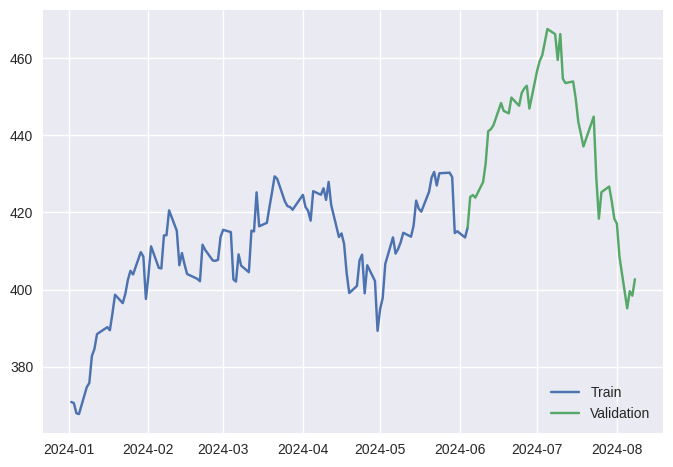

In [26]:
prediction_data_len =5
start_date = '2024-01-01'
end_date = datetime.now()
df_detail = yf.download("MSFT", start_date, end_date)

#sns.lineplot(df_detail, x='Date', y='Close')
data = df_detail.filter(['Close'])
training_data_len = int(np.ceil( len(data) * 0.70 ))   # set train len to 1 for pred

print('Dataset length-', len(data), ' | Training len-', training_data_len, ' | Default prediction len-', len(data)-training_data_len, ' | Custom Prediction len-', prediction_data_len)
train_data = data.iloc[0:int(training_data_len), :]
val_data = data.iloc[training_data_len-1: , :]

plt.plot(train_data['Close'])
plt.plot(val_data[['Close']])
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(20,1,2))
fitted = model.fit()
#print(fitted.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


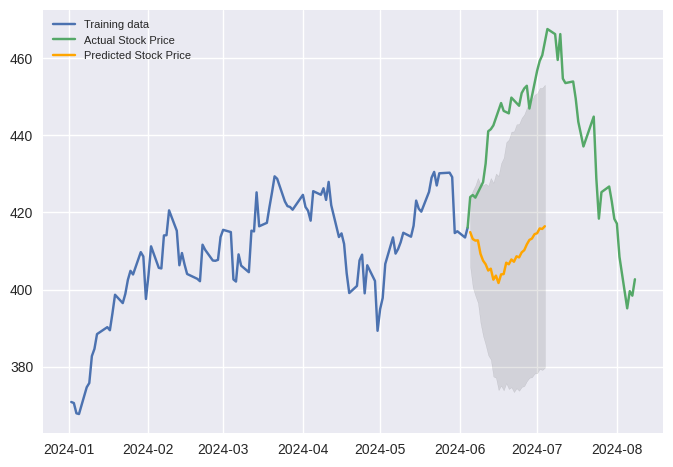

In [27]:
# Forecast with confidence intervals
forecast = fitted.get_forecast(steps=30)
conf_int = forecast.conf_int(alpha=.05)  # 95% confidence interval

# Extract the forecasted values and confidence intervals
fc = forecast.predicted_mean
lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]

# Convert to pandas Series
start_date = train_data.index.max() + pd.Timedelta(days=1)
date_index = pd.date_range(start=start_date, periods=len(fc), freq='D')

fc_series = pd.Series(pd.array(fc), index=date_index)
lower_series = pd.Series(pd.array(lower_series), index=date_index)
upper_series = pd.Series(pd.array(upper_series), index=date_index)

# Plot
plt.plot(train_data, label='Training data')
plt.plot(val_data, label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left', fontsize=8)
plt.show()